# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [11]:
data = pd.read_csv("/content/Dataset_Klasifikasi.csv")
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,0
1,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,3
2,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1
3,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,2
4,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0


# **3. Data Splitting**

Tahap mengubah data kategorikal menjadi numerical

In [12]:
label_encoders = {}

categorical_columns = [
    'Marital Status', 'Education Level', 'Smoking Status',
    'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits',
    'Sleep Patterns', 'History of Mental Illness',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions'
]

# Loop untuk melakukan label encoding
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,31.0,1,1,2.0,2,0,1,26265.67,2,1,0,1,0,1,1,0
1,55.0,1,2,1.0,2,2,0,42710.36,0,2,0,1,0,0,1,3
2,78.0,3,3,1.0,2,2,0,125332.79,1,2,1,0,0,1,0,1
3,58.0,0,3,3.0,2,1,1,9992.78,2,1,2,0,0,0,0,2
4,18.0,2,2,0.0,2,2,1,8595.08,1,1,0,1,0,1,1,0


Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
X = data[numeric_columns].drop(columns=['Cluster'], errors='ignore')
y = data['Cluster']

saclade = StandardScaler()
X = saclade.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(6897, 15), y_train=(6897,)
Test set shape: X_test=(2957, 15), y_test=(2957,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [15]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tp = np.diag(cm)
        fp = cm.sum(axis=0) - tp
        fn = cm.sum(axis=1) - tp
        tn = cm.sum() - (fp + fn + tp)

    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp.sum(),
        'False Positive (FP)': fp.sum(),
        'False Negative (FN)': fn.sum(),
        'True Negative (TN)': tn.sum(),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.997633   0.997633  0.997633  0.997631
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  1.000000   1.000000  1.000000  1.000000
4              Naive Bayes (NB)  1.000000   1.000000  1.000000  1.000000


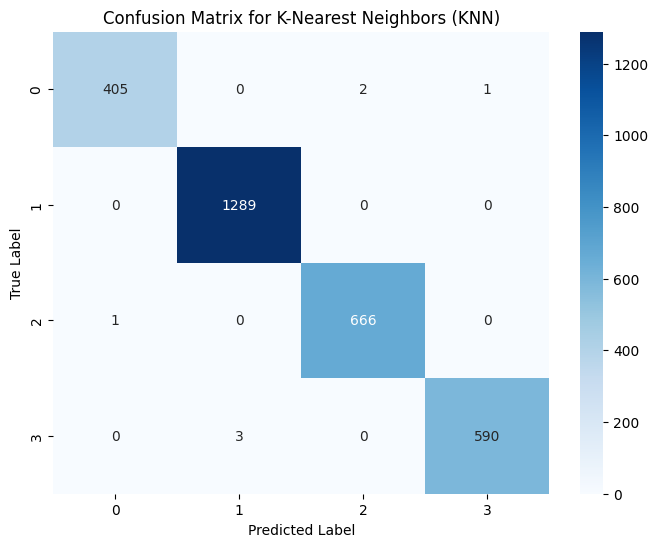

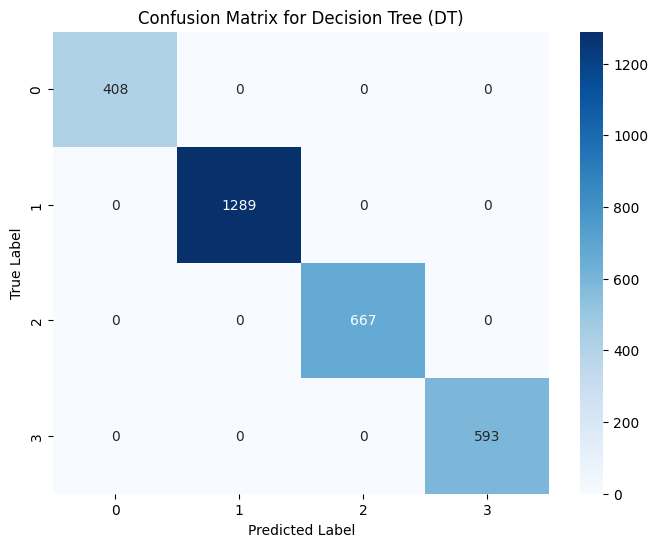

In [16]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)

plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors (KNN)')
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree (DT)')

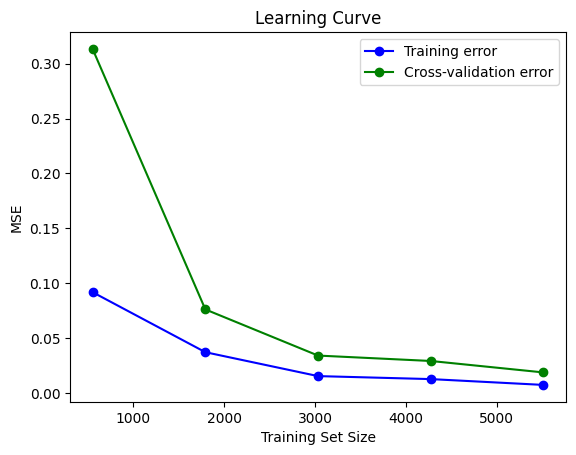

In [17]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

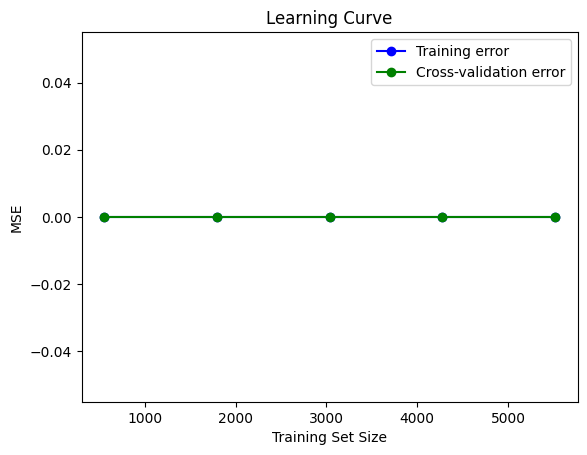

In [18]:
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Pada kalasifikasi ini menggunakan 5 algoritma yaitu K-Nearest Neighbors, Decision Tree, Random Forest, Support Vector Machine, dan Naive Bayes. Dari kelimat algoritma tersebut diketahui bahawa algoritma Decision Tree, Random Forest, Support Vector Machine, dan Naive Bayes mengalami overfitting yang mana setiap hasil matrix evaluasi 100%.

Kemudian pada algoritma K-Nearest Neighbors  model berjalan dengan baik yang hasil matrix evaluasi mendekati 100% yaitu 99%, Bisa juga dilihat pada learning curve yang mana menampilkan good fit. Jadi untuk dataset ini lebih cocok menggunakan algoritma K-Nearest Neighbors.

Untuk Tampilan confusion matrix terdapat 16 kotak ini terjadi karena terdapat 4 kelas yang ada pada target.

